<a href="https://colab.research.google.com/github/PaulToronto/AI-and-Machine-Learning-for-Coders---Book/blob/main/3_1_Extra_6_Basic_things_to_know_about_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6 Basic things to know about Convolution

- This code is from a Medium article: https://tinyurl.com/4z632exw
- The code in the section `Implementing cv2.filter2D() from scratch` is my own

## Imports

In [1]:
import cv2
# replacement for cv2.imshow
#. because it causes Jupyter notebooks to crash
from google.colab.patches import cv2_imshow

# cv2 can't read files from github
#. so we use this instead
from skimage import io

import numpy as np
import matplotlib.pyplot as plt

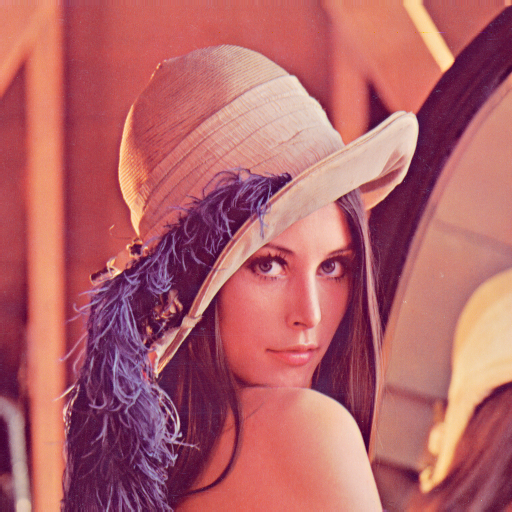

In [2]:
url = 'https://raw.githubusercontent.com/PaulToronto/'
url += 'AI-and-Machine-Learning-for-Coders---Book/main/images/lena512color.tiff'

# read this using io.imread since cv2.imread doesn't work
#. for images stored on github
img = io.imread(url)

# save image locally
io.imsave('lena512color.tiff', img)

# read the local version
img = cv2.imread('lena512color.tiff')

cv2_imshow(img)

In [3]:
# identity kernel
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
print(identity_kernel)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


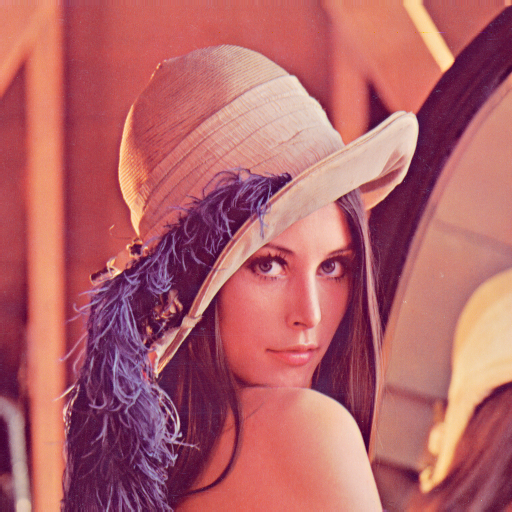

In [4]:
img_identity_1 = cv2.filter2D(img, -1, identity_kernel)
cv2_imshow(img_identity_1)

In [5]:
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
print(sharpening_kernel)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


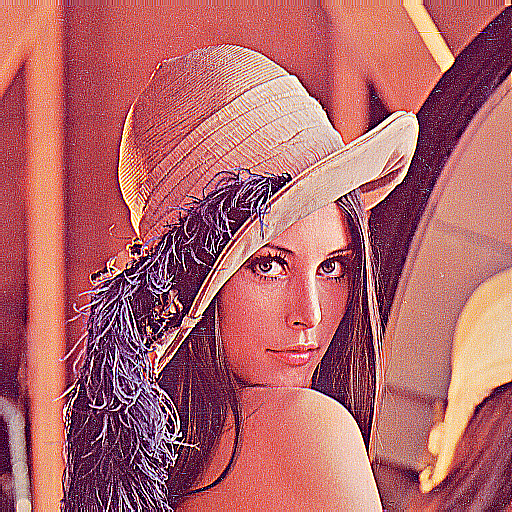

In [6]:
img_sharp_1 = cv2.filter2D(img, -1, sharpening_kernel)
cv2_imshow(img_sharp_1)

In [7]:
blurring_kernel = np.array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

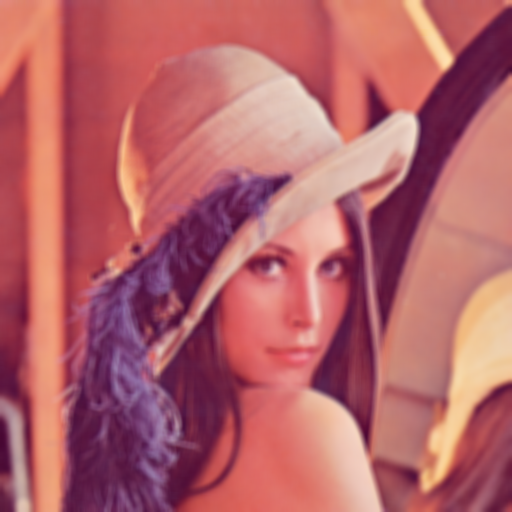

In [8]:
img_blur_1 = cv2.filter2D(img, -1, blurring_kernel)
cv2_imshow(img_blur_1)

## Implementing `cv2.filter2D()` from scratch

In [9]:
def weighted_sum(array1, array2):
    sum = 0
    for (row, col), _ in np.ndenumerate(array1):
        sum += array1[row, col] * array2[row, col]
    return sum

In [10]:
# I had trouble debugging this function
#. in order to get it to work:
# 1. I needed to convert the
#.   arrays to dtype=np.float32, that way the intermediate
#.   calculations maintained their precision
# 2. I also used np.clip since some values were out of the
#.   range of 0-255, even though cv2_imshow rendered it correctly
#.   without that
def custom_filter2D(img, kernel):
    # ensure the kernel is a numpy array
    img = img.astype(np.float32)
    kernel = np.array(kernel, dtype=np.float32)

    # allows the code to work with kernels of different sizes
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # create an empty output image
    # the kernel can't easily handle the images of the borders
    # . so we omit them
    # NOTE: `cv2.filter2D` handles the borders differently
    #. it it outputs an image of the same size
    output_image = np.zeros_like(img[pad_height:-pad_height, pad_width:-pad_width, :], dtype=np.float32)

    # apply the filter to each of 3 RGB channels
    for channel in range(output_image.shape[2]):
        for (row, col), _ in np.ndenumerate(output_image[:,:,channel]):
            img_part_correspond_2_kernel = img[row:row+kernel_height, col:col+kernel_width, channel]

            # compute the convolution
            conv_result = np.sum(img_part_correspond_2_kernel * kernel)

            output_image[row, col, channel] = conv_result

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image

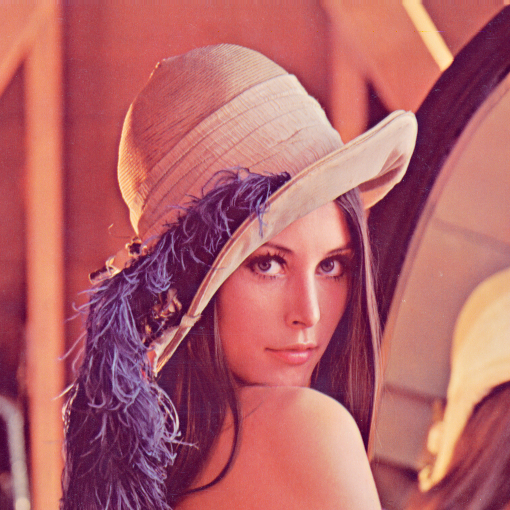

In [11]:
img_identity_2 = custom_filter2D(img, identity_kernel)
cv2_imshow(img_identity_2)

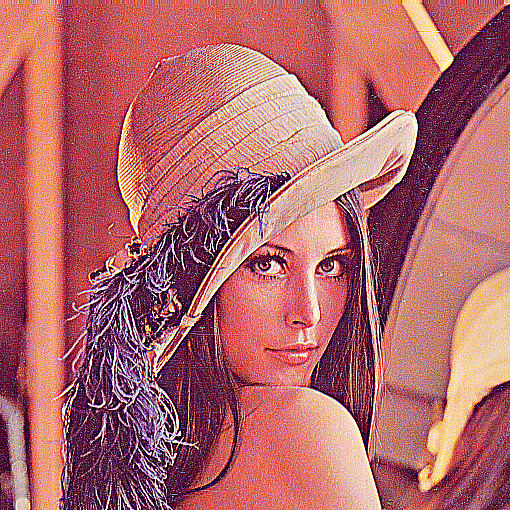

In [12]:
img_sharp_2 = custom_filter2D(img, sharpening_kernel)
cv2_imshow(img_sharp_2)

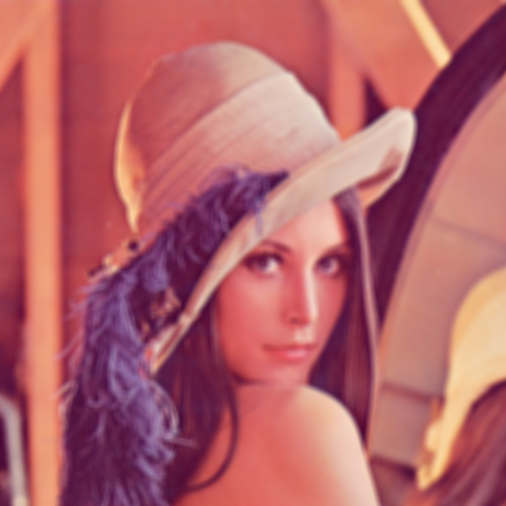

In [13]:
img_blur_2 = custom_filter2D(img, blurring_kernel)
cv2_imshow(img_blur_2)